C:\Users\HiRaD\AppData\Local\Temp\ipykernel_1352\2786619739.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_data.csv")


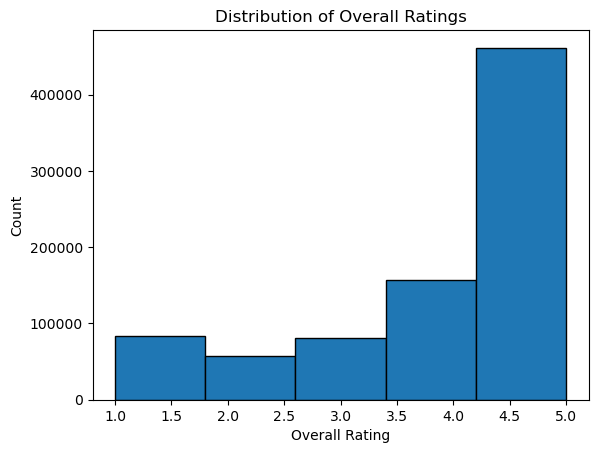

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train_data.csv")

# Plot the distribution
plt.hist(df["overall"], bins=5, edgecolor='black')
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.title("Distribution of Overall Ratings")
plt.show()

Based on the distribution of the "overall" column, it appears that the dataset is imbalanced. The histogram shows that there is a higher frequency of positive ratings (5 and to some extent 4) compared to lower ratings (1, 2 and 3). This imbalance in ratings may pose challenges when building a model, as it may skew the model's predictions towards the majority class and potentially lead to a biased performance evaluation.
TThis is especially important if you want your model to make accurate predictions for all classes of ratings; So it is necessary to address the imbalance in the dataset. Some solustions to consider:

    1. Oversampling: This involves randomly duplicating samples from the minority class to increase its representation in the dataset. This can be achieved by techniques like randomly resampling or using more advanced methods such as Synthetic Minority Over-sampling Technique (SMOTE).

    2. Undersampling: This approach aims to reduce the number of samples from the majority class to match the minority class. By systematically removing instances from the majority class, the dataset becomes more balanced. However, this approach may result in a loss of information and potential under-representation of the majority class.

    3. Combining oversampling and undersampling: A hybrid approach that involves both duplicating samples from the minority class and removing instances from the majority class. This strategy seeks to strike a balance between maintaining information and addressing class imbalance.

    4. Class weighting: Instead of modifying the dataset, this technique assigns different weights to different classes during model training. By amplifying the impact of the minority class, the model can learn to be more sensitive to it.

In conclusion, given the class imbalance in the dataset, it is better to balance the data for modeling purposes. This will help to mitigate the bias that may arise due to the unequal representation of different ratings. Applying suggestted methods can help with the present imbalance.

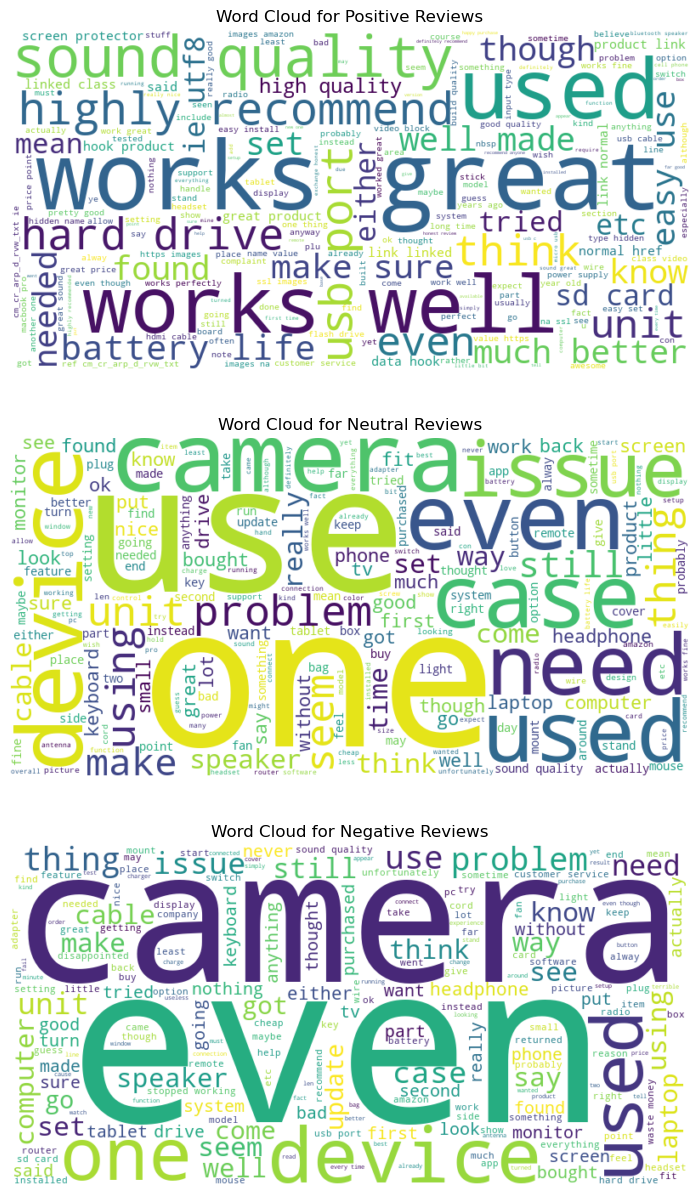

In [7]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def preprocess_text(text):
    # Tokenization, lowercase, and removing punctuation
    tokens = text.lower().split()
    tokens = [word.strip(".,!?()[]{}\"'") for word in tokens]
    
    # Removing stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    return " ".join(tokens)

# Define the categories based on "overall" column values
positive = df[df['overall'].isin([4, 5])]
neutral = df[df['overall'] == 3]
negative = df[df['overall'].isin([1, 2])]

# Generate Word Cloud for positive reviews
positive_text = ' '.join(positive['reviewText'].apply(preprocess_text))
positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

# Generate Word Cloud for neutral reviews
neutral_text = ' '.join(neutral['reviewText'].apply(preprocess_text))
neutral_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(neutral_text)

# Generate Word Cloud for negative reviews
negative_text = ' '.join(negative['reviewText'].apply(preprocess_text))
negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

# Plot the Word Clouds
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].set_title('Word Cloud for Positive Reviews')
axes[0].axis('off')

axes[1].imshow(neutral_wordcloud, interpolation='bilinear')
axes[1].set_title('Word Cloud for Neutral Reviews')
axes[1].axis('off')

axes[2].imshow(negative_wordcloud, interpolation='bilinear')
axes[2].set_title('Word Cloud for Negative Reviews')
axes[2].axis('off')

# plt.tight_layout()
plt.show()


In [8]:
# Get the most frequent words from the positive and negative Word Clouds
positive_words = positive_wordcloud.words_
negative_words = negative_wordcloud.words_

# Check for overlap between the positive and negative categories
overlap_words = set(positive_words.keys()) & set(negative_words.keys())

if overlap_words:
    print("There is an overlap between the positive and negative categories.")
    print("Overlap words:")
    for word in overlap_words:
        print(word)
else:
    print("There is no overlap between the positive and negative categories.")


There is an overlap between the positive and negative categories.
Overlap words:
simply
customer service
point
show
even
tried
box
remote
bad
guess
anything
display
probably
either
problem
kind
even though
computer
appear
running
wanted
turned
must
give
set
radio
sd card
stand
may
actually
fact
order
instead
etc
line
option
setup
went
already
thought
needed
alway
think
maybe
said
wire
system
everything
see
sure
yet
seem
function
got
though
help
installed
tablet
part
headset
sometime
nothing
something
come
going
go
mean
usb port
unit
model
ok
found
tell
setting
put
know
every time
still
least
used
switch
find
hard drive
place
sound quality
say


    1. There are several general terms that can apply to both positive and negative contexts, such as "simply," "point," "show," "even," "tried," and "bad." These words are relatively neutral.

    2. The terms "customer service," "problem," and "help" suggest that the users might have encountered challenges or issues with a product or service. It could indicate that customer support plays a significant role in shaping customers' experiences.

    3. Words like "display," "sound quality," "remote," and "headset" hint towards electronic gadgets or devices. The positive or negative sentiments associated with these terms could reflect user satisfaction or dissatisfaction with their performance.

    4. Some words indicate user expectations or preferences that were either met or unfulfilled, such as "wanted," "expected," "thought," "needed," and "switch." These can provide insights into user needs and desires.

    5. The presence of words like "hard drive," "tablet," "USB port," and "model" suggests that users might be discussing specific technical aspects or features of a product. 

In [12]:
import csv
from collections import defaultdict

# Assuming the CSV file has the following columns: reviewerName, vote
filename = "train_data.csv"

# Create a defaultdict to store the total votes for each reviewer
reviewer_votes = defaultdict(int)

# Read the CSV file and calculate total votes for each reviewer
with open(filename, "r", encoding="utf-8") as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        reviewer_name = row["reviewerName"]
        vote = row["vote"]
        if vote.isnumeric():
            reviewer_votes[reviewer_name] += int(vote)

# Get the top 10 reviewers with the highest total votes
top_reviewers = sorted(reviewer_votes.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the name and total votes for each top reviewer
for i, (reviewer, total_votes) in enumerate(top_reviewers):
    print(f"Reviewer {i+1}: {reviewer}\nTotal Votes: {total_votes}\n")


Reviewer 1: Amazon Customer
Total Votes: 14336

Reviewer 2: Benson Leung
Total Votes: 4319

Reviewer 3: Michael
Total Votes: 2398

Reviewer 4: Dave
Total Votes: 1693

Reviewer 5: Nicholas
Total Votes: 1567

Reviewer 6: John
Total Votes: 1545

Reviewer 7: Mike
Total Votes: 1514

Reviewer 8: Alex
Total Votes: 1445

Reviewer 9: Jeff
Total Votes: 1384

Reviewer 10: VermontGuy
Total Votes: 1335



C:\Users\HiRaD\AppData\Local\Temp\ipykernel_2356\2003243493.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_data.csv")


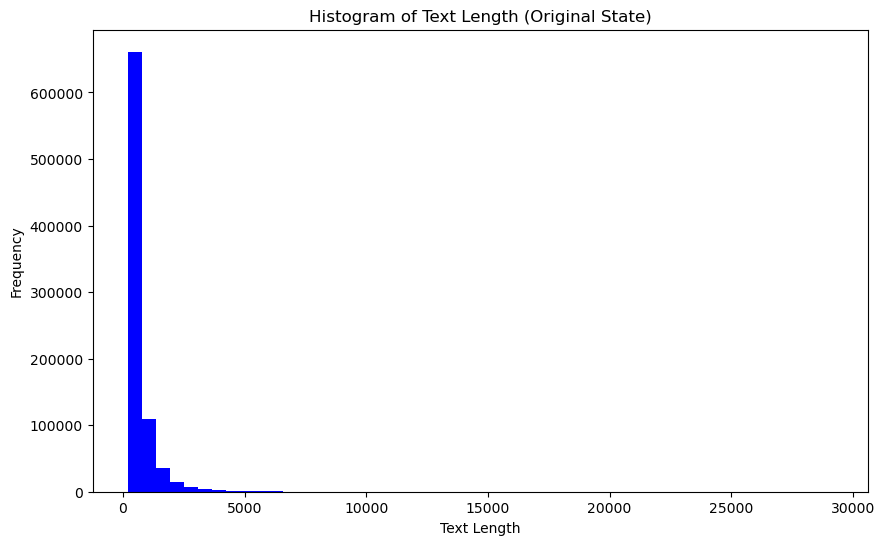

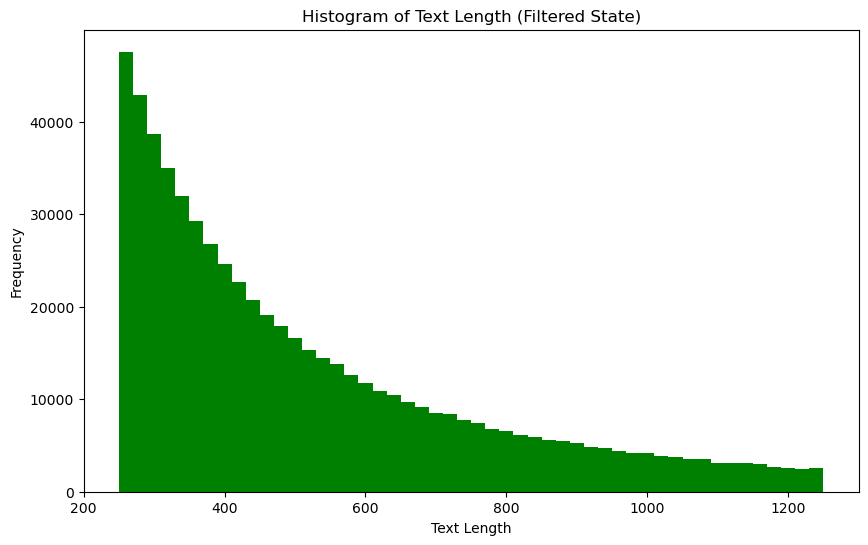

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and load "reviewText" column into a DataFrame
df = pd.read_csv("train_data.csv")
review_text = df["reviewText"]

# Original state histogram
plt.figure(figsize=(10, 6))
plt.hist(review_text.str.len(), bins=50, color="blue")
plt.title("Histogram of Text Length (Original State)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Filtered state histogram
# Exclude samples with text length less than 50 characters or greater than 1000 characters
filtered_review_text = review_text[(review_text.str.len() >= 250) & (review_text.str.len() <= 1250)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_review_text.str.len(), bins=50, color="green")
plt.title("Histogram of Text Length (Filtered State)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


In [10]:
# Filter the dataset to include only 5-star ratings
five_star_ratings = df[df["overall"] == 5]

# Group the data by product (asin) and count the number of 5-star reviews
top_products = five_star_ratings.groupby("asin").agg({"summary": "count"}).nlargest(10, "summary")

# Join the product information (brand name and title) from another DataFrame (product_info.csv)
product_info = pd.read_csv("title_brand.csv")
top_products = top_products.join(product_info.set_index("asin"), on="asin")

# Rename the "summary" column to "Number of 5-star Ratings"
top_products = top_products.rename(columns={"summary": "Number of 5-star Ratings"})

# Display the top 10 products in a table format
top_products


,Number of 5-star Ratings,title,brand
asin,,,
B010OYASRG,1163,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,Cambridge Soundworks
B00L0YLRUW,659,NETGEAR N300 WiFi Range Extender (EX2700),NETGEAR
B01DA0YCNC,600,Roku Streaming Stick (3600R) - HD Streaming Pl...,Roku
B000VS4HDM,598,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...,StarTech
B0043T7FXE,552,Logitech M570 Wireless Trackball Mouse &ndash;...,Logitech
B00OBRE5UE,529,Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...,Samsung
B00S9SGNNS,471,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...,Asus
B000WYVBR0,448,VideoSecu ML531BE TV Wall Mount for Most 27&qu...,VideoSecu
B00P7EVST6,433,Arlo - Wireless Home Security Camera System | ...,"Arlo Technologies, Inc"


In [14]:
# Group the data by brand (asin) and count the number of reviews for each brand
brand_counts = df.groupby("asin").size().reset_index(name="count")

# Sort the brands by the number of reviews in descending order and select the top 10 brands
top_brands = brand_counts.nlargest(10, "count")

# Join the brand information (brand name) from another DataFrame (product_info.csv)
product_info = pd.read_csv("title_brand.csv")
top_brands = top_brands.join(product_info.set_index("asin"), on="asin")

# Group the data by brand and calculate the average rating for each brand
brand_ratings = df.groupby("asin").agg({"overall": "mean"})

# Join the average ratings with the top brands DataFrame
top_brands = top_brands.join(brand_ratings, on="asin")

# Rename the "overall" column to "Average Rating"
top_brands = top_brands.rename(columns={"overall": "Average Rating"})

# Sort the top brands by the average rating in descending order
top_brands = top_brands.sort_values("Average Rating", ascending=False)

# Display the table including the brand name and average rating
print(top_brands[["brand", "Average Rating"]])


                        brand  Average Rating
5941                 StarTech        4.403531
12814                Logitech        4.285047
65163    Cambridge Soundworks        4.248246
83509                    Roku        4.080321
42198                 Sabrent        4.006579
44482                 NETGEAR        3.881328
27757                 TP-LINK        3.725131
55300                    Asus        3.690608
51627  Arlo Technologies, Inc        3.656502
80462                 SanDisk        3.583668
